In [1]:
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt

import coordinate_utils as cu

from datetime import datetime
from pathlib import Path
root = Path().cwd()

In [2]:
ds = xr.open_mfdataset(str(root/"nc"/"frp"/"frp*.nc"), engine="netcdf4")

In [3]:
ds

<xarray.Dataset>
Dimensions:     (valid_time: 7984, latitude: 1800, longitude: 3600)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2003-01-02 2003-01-03 ... 2024-11-10
  * latitude    (latitude) float64 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * longitude   (longitude) float64 0.05 0.15 0.25 0.35 ... 359.8 359.9 359.9
Data variables:
    frpfire     (valid_time, latitude, longitude) float32 dask.array<chunksize=(41, 200, 400), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-10T22:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
print(ds.coords["longitude"].values)

[5.0000e-02 1.5000e-01 2.5000e-01 ... 3.5975e+02 3.5985e+02 3.5995e+02]


In [5]:
norcal_frp = ds.sel(longitude=slice(cu.convert_lon_0_360(-124.35),cu.convert_lon_0_360(-117.25)))
norcal_frp = norcal_frp.sel(latitude=slice(42,25.35))["frpfire"]
norcal_frp = norcal_frp.sel(valid_time=slice(cu.ts_to_dt('2003-01-02T00'), cu.ts_to_dt('2023-01-01T0')))
norcal_frp_np = norcal_frp.values

norcal_frp

<xarray.DataArray 'frpfire' (valid_time: 7305, latitude: 167, longitude: 71)>
dask.array<getitem, shape=(7305, 167, 71), dtype=float32, chunksize=(41, 120, 43), chunktype=numpy.ndarray>
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2003-01-02 2003-01-03 ... 2023-01-01
  * latitude    (latitude) float64 41.95 41.85 41.75 41.65 ... 25.55 25.45 25.35
  * longitude   (longitude) float64 235.7 235.8 235.9 ... 242.5 242.6 242.7
Attributes: (12/33)
    GRIB_paramId:                             210099
    GRIB_dataType:                            ga
    GRIB_numberOfPoints:                      6480000
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_units:                               W m**-2
    long_name:                                Wildfire radiative power
    units:                                    W m**-2
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0

In [6]:
frpsum = norcal_frp_np.sum(axis=(1,2))

num_fire_days = np.count_nonzero(frpsum == 0)
num_fire_days

682

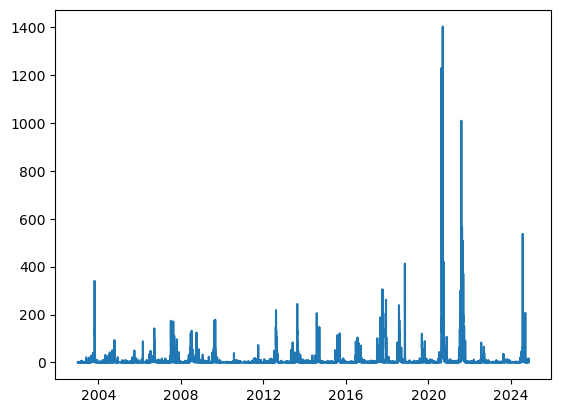

In [7]:
plt.plot(norcal_frp.coords["valid_time"],frpsum)

In [8]:
norcal_frp.sel(valid_time=slice(datetime(year=2003, month=12, day=30),datetime(year=2004, month=1, day=2)))

<xarray.DataArray 'frpfire' (valid_time: 4, latitude: 167, longitude: 71)>
dask.array<getitem, shape=(4, 167, 71), dtype=float32, chunksize=(3, 120, 43), chunktype=numpy.ndarray>
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2003-12-30 2003-12-31 ... 2004-01-02
  * latitude    (latitude) float64 41.95 41.85 41.75 41.65 ... 25.55 25.45 25.35
  * longitude   (longitude) float64 235.7 235.8 235.9 ... 242.5 242.6 242.7
Attributes: (12/33)
    GRIB_paramId:                             210099
    GRIB_dataType:                            ga
    GRIB_numberOfPoints:                      6480000
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_units:                               W m**-2
    long_name:                                Wildfire radiative power
    units:                                    W m**-2
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0

In [ ]:
hgt = xr.open_mfdataset(str(root/"nc"/"era5"/"era5h500.nc"), engine="netcdf4").sel(valid_time=frp)
sfc = xr.open_mfdataset(str(root/"nc"/"era5"/"era5sfc.nc"), engine="netcdf4")

In [13]:
hgt

<xarray.Dataset>
Dimensions:         (valid_time: 7994, pressure_level: 1, latitude: 161,
                     longitude: 241)
Coordinates:
    number          int64 ...
  * valid_time      (valid_time) datetime64[ns] 2003-01-01 ... 2024-11-19
  * pressure_level  (pressure_level) float64 500.0
  * latitude        (latitude) float64 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * longitude       (longitude) float64 -150.0 -149.8 -149.5 ... -90.25 -90.0
    expver          (valid_time) object dask.array<chunksize=(7994,), meta=np.ndarray>
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 dask.array<chunksize=(2665, 1, 54, 81), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-24T11:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
sfc

<xarray.Dataset>
Dimensions:     (valid_time: 7995, latitude: 161, longitude: 241)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2003-01-01 2003-01-02 ... 2024-11-20
  * latitude    (latitude) float64 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 -150.0 -149.8 -149.5 ... -90.5 -90.25 -90.0
    expver      (valid_time) object dask.array<chunksize=(7995,), meta=np.ndarray>
Data variables:
    u10         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    d2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    msl         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-25T12:40 GRIB to CDM+CF via cfgrib-0.9.1...